# **MScFE622: Stochastic Modelling**
## **Group Work Project #3**
### **Group Number: 4209**

# **Introduction**


This group work project 3 (GWP3) our primary focus is to apply reinforcement learning techniques to aid in portfolio selection. The process of portfolio selection involves selecting a portfolio which optimizes the  expected returns objective consistent with the investors level of risk acceptance. In this GWP will also make reference to https://royalsocietypublishing.org/doi/full/10.1098/rsos.171377 a paper which elaborates more on the application of a risk-aware multi-armed bandit problem to minimize risk and maximise return.

# **Step 2: Pseudocode that illustrating the Steps in Model 1: Sequential Portfolio Selection Problem (from the Huo paper).**

# **Step 3: Data Collection**

**3a. Team member A data collected from 15 financial institutions**

- Two tickers have been delisted i.e., BBT and STI therefore they have been removed from the analysis to avoid nan values.

In [1]:
#Import necessary libraries
import yfinance as yf

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import rand, seed


import pandas_datareader as web
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn


tickers = ["JPM", "WFC", "BAC", "C", "GS","USB", "MS", "KEY", "PNC", "COF", "AXP", "PRU", "SCHW"]
start=datetime(2008, 9, 1)
end=datetime(2008, 10, 31)
fin_data = yf.download(tickers, start, end)["Adj Close"]
fin_data.head()

[*********************100%%**********************]  13 of 13 completed


,AXP,BAC,C,COF,GS,JPM,KEY,MS,PNC,PRU,SCHW,USB,WFC
Date,,,,,,,,,,,,,
2008-09-02,31.773924,25.531294,148.928223,34.988823,129.483093,26.480577,8.322880,30.126406,49.117039,44.671410,19.997492,21.174295,20.872435
2008-09-03,31.992880,26.305435,152.824799,35.565216,131.276581,26.969574,8.395542,30.761047,49.571823,45.859730,20.022297,21.553688,20.738691
2008-09-04,30.303701,24.421930,142.615723,33.750347,126.021240,25.747086,7.873710,29.426136,48.655552,44.394524,19.484730,20.703318,19.842527
2008-09-05,30.812014,25.722836,148.616470,34.825256,127.853981,26.894865,8.567279,30.170181,49.685505,45.421322,19.923056,21.416330,20.865751
2008-09-08,31.687889,27.718090,158.357971,37.956478,132.937073,28.219244,9.075901,31.563440,51.350807,48.986237,20.857590,22.201284,22.444056


**3a. Team member B data collected from 15 non-financial institutions**

- For non-financial institutions one ticker has been delisted from yahoo "HCP".


In [2]:
ticker = ["KR", "PFE", "XOM", "WMT", "DAL", "CSCO", "EQIX", "DUK", "NFLX", "GE", "APA", "F", "REGN", "CMS"]
start="2008-09-01"
end="2008-10-31"
non_fin = yf.download(ticker, start, end)["Adj Close"]
non_fin.head()

[*********************100%%**********************]  14 of 14 completed


,APA,CMS,CSCO,DAL,DUK,EQIX,F,GE,KR,NFLX,PFE,REGN,WMT,XOM
Date,,,,,,,,,,,,,,
2008-09-02,84.531784,8.152998,16.363983,8.105464,26.190973,63.139458,2.665931,115.751602,10.590401,4.405714,10.190768,20.580000,42.738342,44.533028
2008-09-03,85.438026,8.057150,16.060822,8.052432,25.858681,62.515480,2.701398,115.913834,10.586596,4.415714,10.206716,21.799999,42.838673,44.936203
2008-09-04,87.465042,8.069133,15.351142,7.919844,26.115463,60.448528,2.594997,112.384109,10.380877,4.267143,9.924968,20.379999,42.831490,43.853401
2008-09-05,88.577934,7.991255,15.337358,7.787257,26.145662,60.440720,2.606819,113.114372,10.236115,4.237143,9.839914,19.070000,43.519321,43.553905
2008-09-08,87.258362,8.236864,16.102160,7.592798,26.991516,60.456337,2.689576,118.023590,10.399930,4.307143,10.174823,18.900000,44.422089,44.216244


**3a. Team member C: Combining the two data series and calculating returns**


In [25]:
# Define tickers

all_tickers = ['JPM', 'WFC', 'BAC', 'C', 'GS', 'USB', 'MS', 'KEY', 'PNC', 'COF', 'AXP', 'PRU', 'SCHW', 'KR',
           'PFE', 'XOM', 'WMT', 'DAL', 'CSCO', 'EQIX', 'DUK', 'NFLX', 'GE', 'APA', 'F', 'REGN', 'CMS']


#combining the two datasets and collecting the adjusted closing prices only
dataset = yf.download(all_tickers, start="2008-09-01", end="2008-10-31")["Adj Close"]
combined_data=student_df = pd.DataFrame(dataset)
combined_data.index = pd.to_datetime(dataset.index, format='%Y%m%d')
pdata = combined_data.to_numpy()
pdata_dates = pd.to_datetime(combined_data.index, format='%Y-%m-%d')
combined_data.head()



[*********************100%%**********************]  27 of 27 completed


,APA,AXP,BAC,C,CMS,COF,CSCO,DAL,DUK,EQIX,...,NFLX,PFE,PNC,PRU,REGN,SCHW,USB,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2008-09-02,84.531769,31.773911,25.531292,148.928207,8.153001,34.988823,16.363981,8.105467,26.190979,63.139465,...,4.405714,10.190773,49.117039,44.671406,20.580000,19.997484,21.174295,20.872435,42.738358,44.533028
2008-09-03,85.438004,31.992874,26.305445,152.824860,8.057150,35.565216,16.060814,8.052427,25.858681,62.515465,...,4.415714,10.206717,49.571812,45.859734,21.799999,20.022301,21.553696,20.738686,42.838657,44.936188
2008-09-04,87.465050,30.303688,24.421926,142.615738,8.069135,33.750355,15.351141,7.919847,26.115452,60.448517,...,4.267143,9.924972,48.655548,44.394531,20.379999,19.484730,20.703320,19.842529,42.831490,43.853405
2008-09-05,88.577927,30.812023,25.722832,148.616501,7.991253,34.825253,15.337358,7.787259,26.145662,60.440720,...,4.237143,9.839913,49.685497,45.421303,19.070000,19.923052,21.416327,20.865753,43.519325,43.553913
2008-09-08,87.258377,31.687895,27.718092,158.357986,8.236862,37.956482,16.102163,7.592799,26.991512,60.456318,...,4.307143,10.174821,51.350826,48.986244,18.900000,20.857594,22.201284,22.444059,44.422089,44.216251


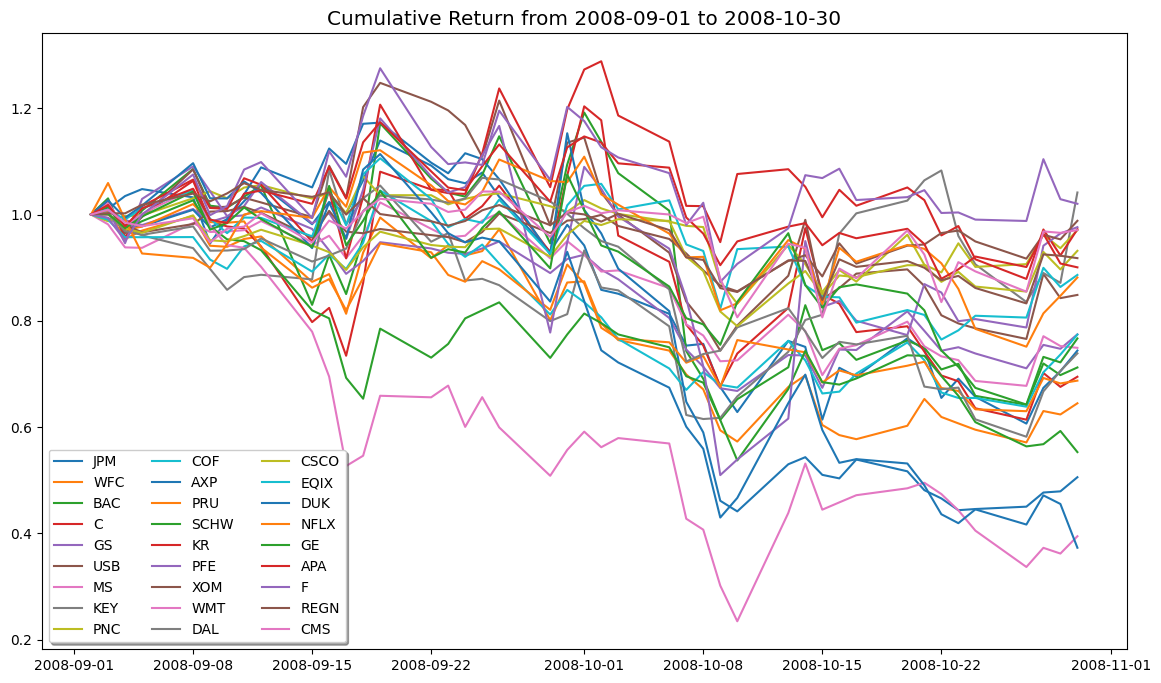

In [4]:
plt.plot(combined_data.index, combined_data.values/combined_data.values[0,:], label=all_tickers)
title = 'Cumulative Return from 2008-09-01 to 2008-10-30'
plt.title(title, fontsize='x-large')
#plt.xlim([datetime.date(2008, 9, 1), datetime.date(2008, 10, 31)])
fig = plt.gcf()
fig.set_size_inches(14,8)
plt.legend(loc='lower left',
          ncol=3, fancybox=True, shadow=True);

Calculating Returns

In [5]:
#computing Returns
returns = dataset.pct_change()
returns.fillna(0, inplace=True)
returns.head()

,APA,AXP,BAC,C,CMS,COF,CSCO,DAL,DUK,EQIX,...,NFLX,PFE,PNC,PRU,REGN,SCHW,USB,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2008-09-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-09-03,0.010721,0.006891,0.030322,0.026164,-0.011756,0.016474,-0.018527,-0.006543,-0.012688,-0.009883,...,0.002270,0.001565,0.009259,0.026601,0.059281,0.001240,0.017918,-0.006408,0.002346,0.009053
2008-09-04,0.023725,-0.052798,-0.071602,-0.066803,0.001487,-0.051030,-0.044187,-0.016465,0.009930,-0.033063,...,-0.033646,-0.027604,-0.018483,-0.031949,-0.065138,-0.026848,-0.039454,-0.043212,-0.000167,-0.024096
2008-09-05,0.012724,0.016774,0.053268,0.042076,-0.009651,0.031850,-0.000898,-0.016741,0.001157,-0.000129,...,-0.007030,-0.008570,0.021168,0.023129,-0.064279,0.022496,0.034439,0.051568,0.016059,-0.006830
2008-09-08,-0.014897,0.028426,0.077567,0.065548,0.030735,0.089912,0.049865,-0.024972,0.032351,0.000258,...,0.016521,0.034036,0.033517,0.078486,-0.008915,0.046907,0.036652,0.075641,0.020744,0.015208


 **Step 4: Correlation Matrix**

<Figure size 640x480 with 0 Axes>

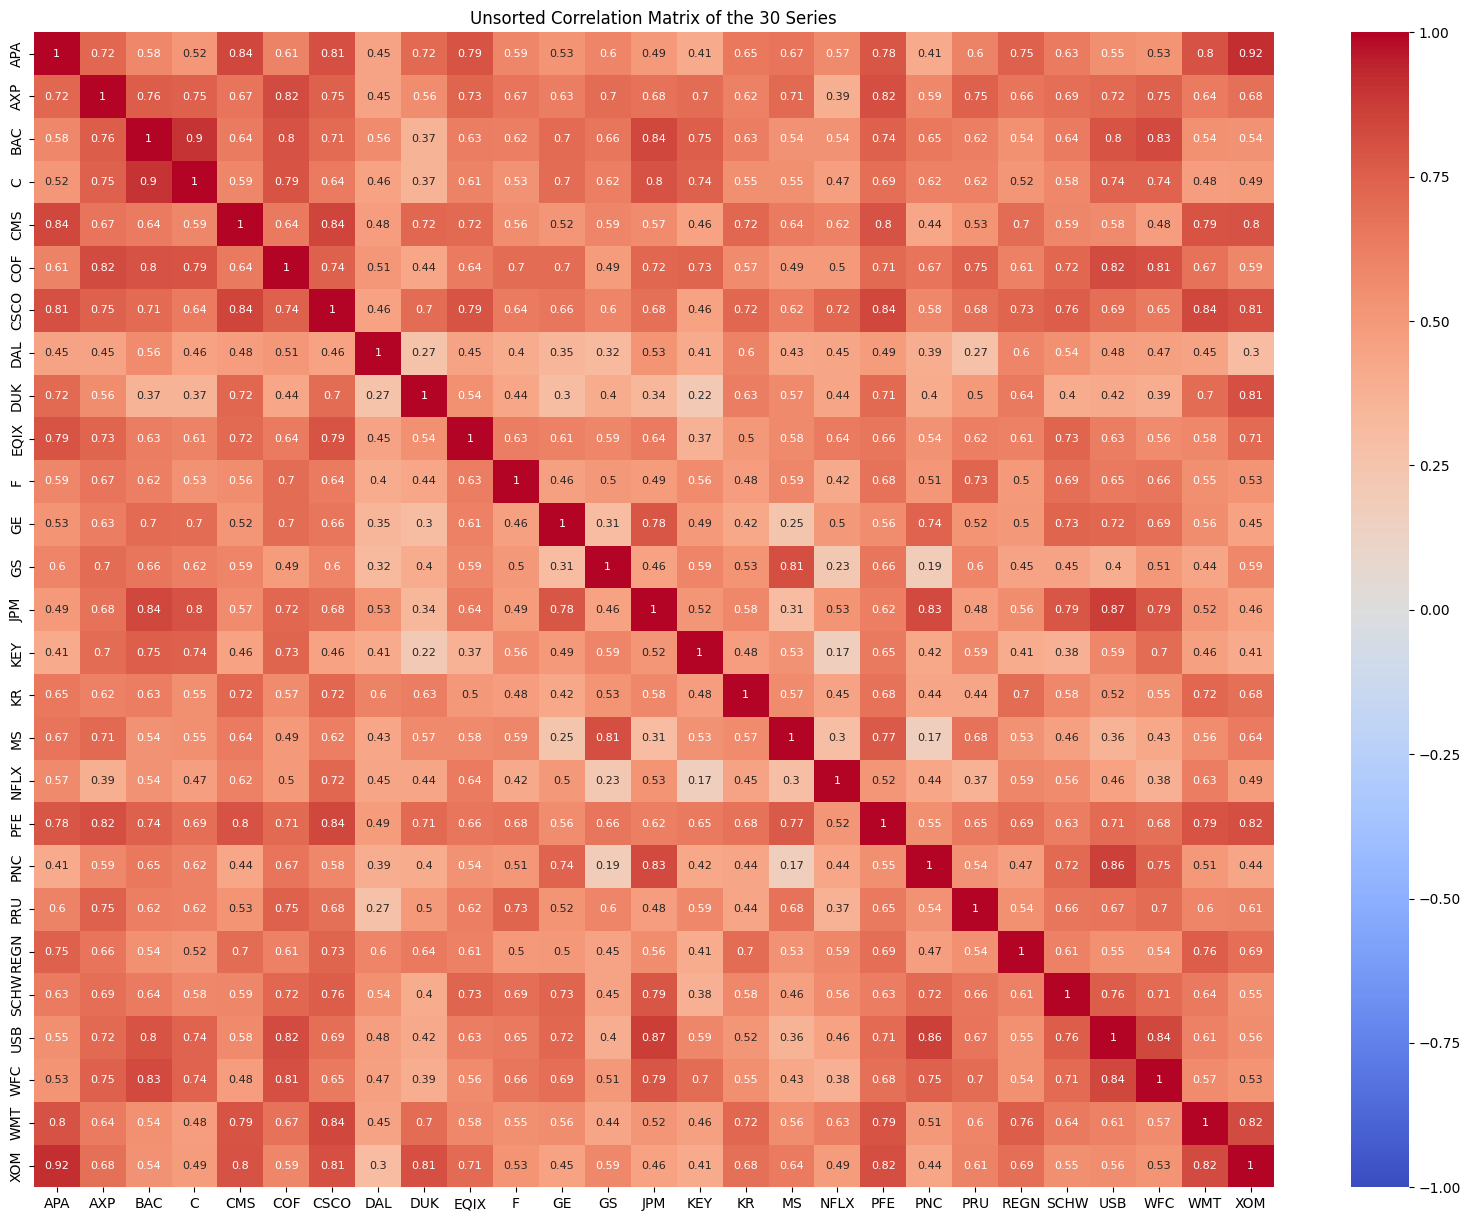

<Figure size 640x480 with 0 Axes>

In [6]:
corr_co = returns.corr() #returns correlation

# Plot the correlation heatmap
plt.figure(figsize=(20, 15))
seaborn.heatmap(corr_co, vmin=-1, annot=True, cmap="coolwarm", annot_kws={'size': 8})
plt.title('Unsorted Correlation Matrix of the 30 Series')
plt.figure()

**Sorting the correlations**

-At this step we need to ensure that closer correlations are near each other. The chosen criteria to sort the stocks is as follows:

1. Firstly we collected the data for the different finacial and non-financial stocks, the we developed a correlation matrix as highlighed in the heatmap above.
2. We then proceeded to calculate the similiarity measure, which aids in assessing similiar and unlike stocks. This was done using the Euclidean distance
3. Thirdly, we decided to come up with a linkage matrix which will assist in coming up with hierarchical clustering according to pair wise correlation in stock returns.
4. Lastly we sort the correlation matrix with the new values.

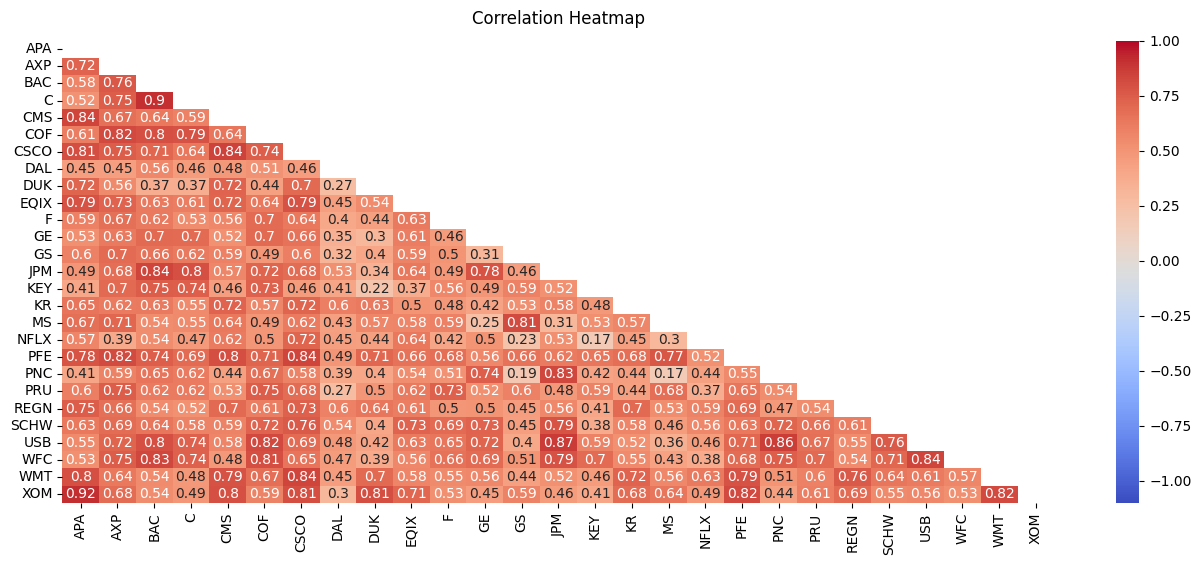

In [7]:
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(corr_co))

heatmap = sns.heatmap(corr_co, mask=mask, vmin=1, vmax=-1, cmap='coolwarm', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Cluster map will make hierarchical clustering according to pair wise correlation in stock returns

<Figure size 1600x1600 with 0 Axes>

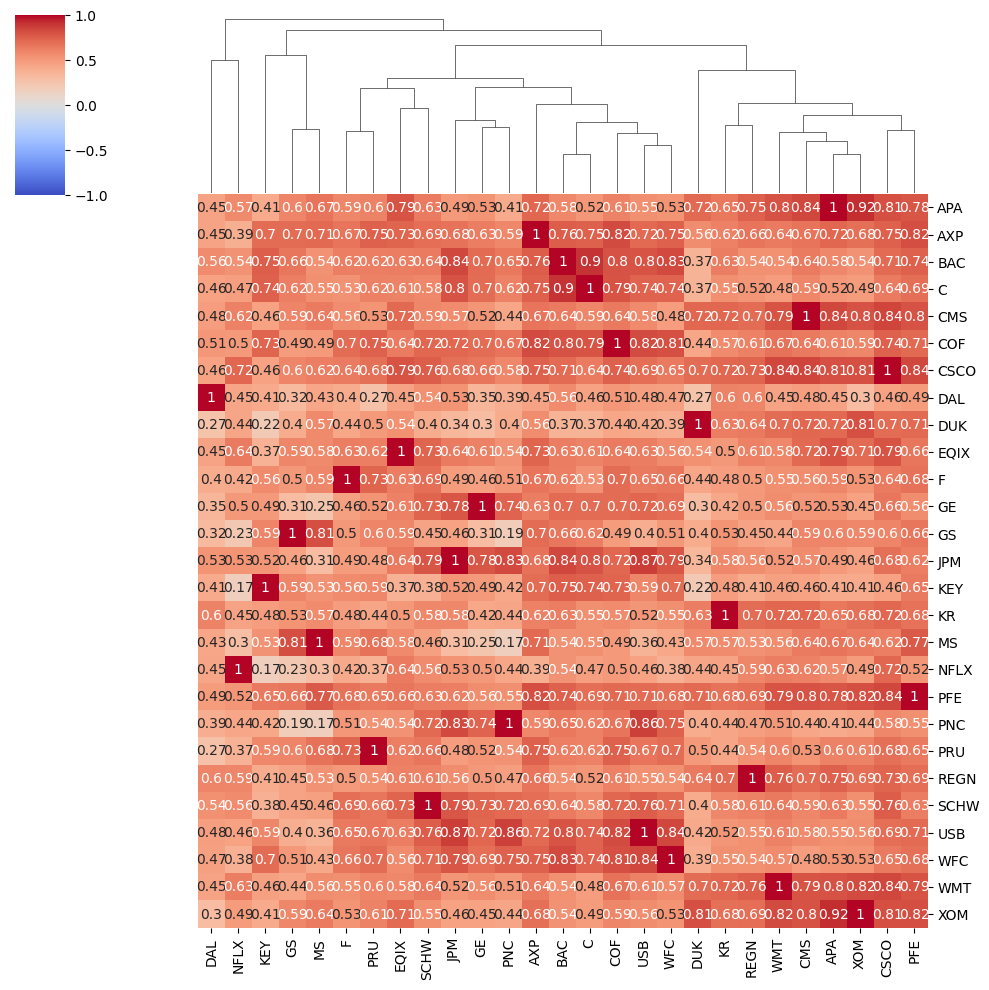

In [8]:
plt.figure(figsize=(16,16))
mask = np.triu(np.ones_like(corr_co))

heatmap = sns.clustermap(corr_co, row_cluster=False, vmin=-1, vmax=1, cmap='coolwarm', annot=True);

# Step 6

In [26]:
def optimal_action(qvalue, eps):  # noQA E203
    nactions = qvalue.shape[0]
    action_hat = np.where(qvalue == np.max(qvalue))

    if rand() <= eps:
        randnum = rand()
        for aa in range(nactions):
            if randnum < (aa + 1) / nactions:  # noQA E203
                break
    elif action_hat[0].shape[0] > 1:  # noQA E203
        # Randomize action when ties
        randnum = rand()
        for aa in range(action_hat[0].shape[0]):  # noQA E203
            if randnum < (aa + 1) / action_hat[0].shape[0]:  # noQA E203
                break
        aa = action_hat[0][aa]
    else:
        aa = np.argmax(qvalue)

    return aa


def reward_update(action, reward, qvalue_old, alpha):  # noQA E203
    qvalue_new = qvalue_old.copy()

    qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])

    return qvalue_new

In [27]:
NK = pdata.shape[1]
EPSILON = 0.1
ALPHA = 0.975
NEPISODES = 1000
HOLD = 1
TMAX = pdata.shape[0] - HOLD
# NEW PARAMETER
UCB_WEIGHT = 1.0
seed(1234)

reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))

reward_queue = np.zeros((HOLD, 2))

for run in range(NEPISODES):  # noQA E203
    # Initialize q function and actions record
    qvalue = np.zeros((NK))
    qvalue_up = np.zeros((NK))
    nactions = np.zeros((NK))
    for tt in range(TMAX):  # noQA E203
        aa_opt = optimal_action(qvalue_up, EPSILON)
        nactions[aa_opt] += 1
        # Compute reward as return over holding period
        reward_queue[HOLD - 1, 0] = (
            pdata[tt + HOLD, aa_opt] - pdata[tt, aa_opt]
        ) / pdata[tt, aa_opt]
        reward_queue[HOLD - 1, 1] = aa_opt
        # Update Q function using action chosen HOLD days before
        qvalue = reward_update(
            int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA
        )
        # Upper-confidence adjustment
        qvalue_up = np.zeros((NK))
        for aa in range(NK):
            if nactions[aa] == 0:  # noQA E203
                qvalue_up[aa] = np.max(qvalue) + 1.0
            else:
                qvalue_up[aa] = qvalue[aa] + UCB_WEIGHT * np.sqrt(np.log(tt + 1) / nactions[aa])
        reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]  # noQA E203
        reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
        optimal_avg[tt] += (
            aa_opt == np.argmax((pdata[tt + HOLD, :] - pdata[tt, :]) / pdata[tt, :])
        ) / NEPISODES  # noQA E203

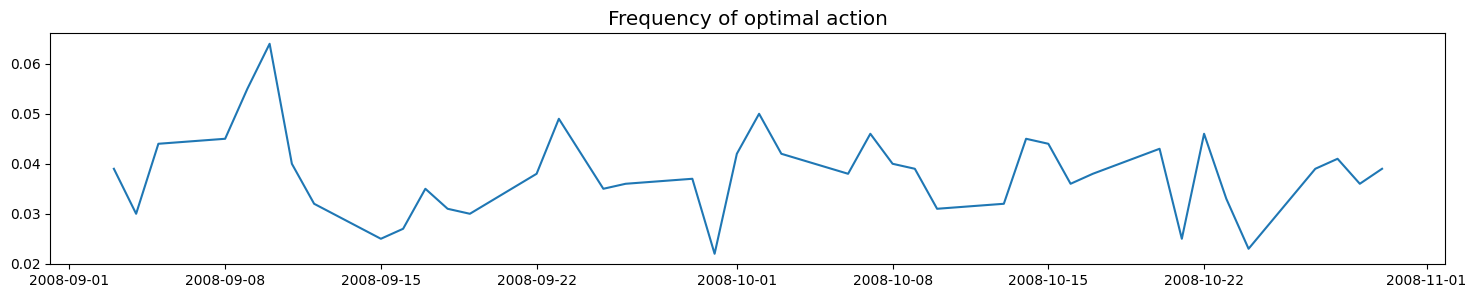

In [28]:
plt.plot(pdata_dates[HOLD : pdata.shape[0]], optimal_avg)  # noQA E203
plt.title("Frequency of optimal action", fontsize="x-large")

fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

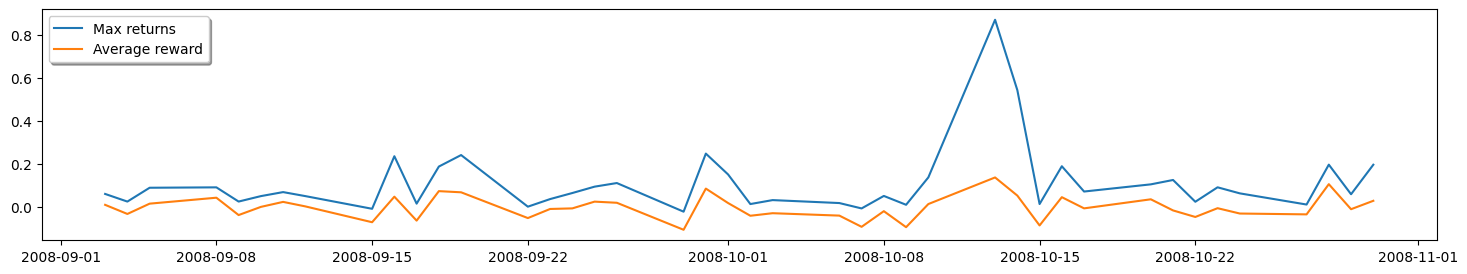

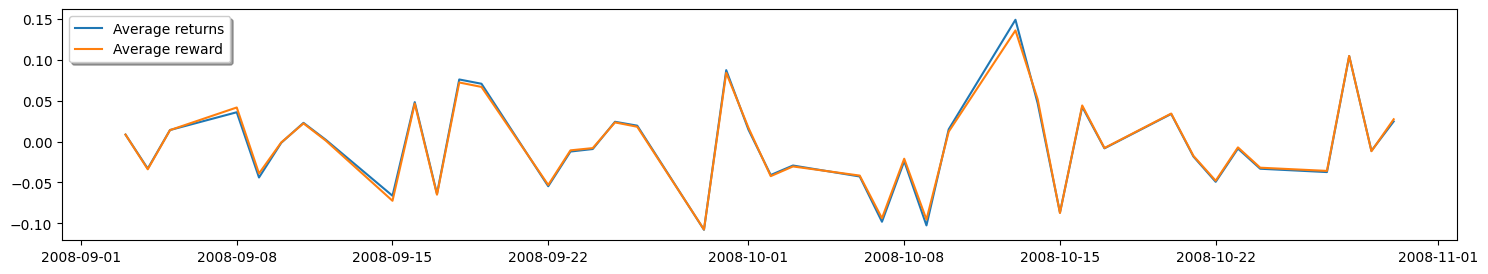

0.03819047619047622
-0.5696119760992149 0.8698179317598119
-0.5545764807805553 0.8472219604509286


In [29]:
plt.plot(
    pdata_dates[HOLD : pdata.shape[0]],
    np.max(
        (pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :], axis=1
    ),
    label="Max returns",
)  # noQA E203
plt.plot(
    pdata_dates[HOLD : pdata.shape[0]], reward_avg, label="Average reward"
)  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(
    pdata_dates[HOLD : pdata.shape[0]],
    np.mean(
        (pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :], axis=1
    ),
    label="Average returns",
)  # noQA E203
plt.plot(
    pdata_dates[HOLD : pdata.shape[0]], reward_avg, label="Average reward"
)  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

# Average frequency of optimal action
print(np.mean(optimal_avg))
# Average annualized return from holding the equally-weighted portfolio
print(
    (
        1
        + np.mean(
            (pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :]
        )
    )
    ** (250 / HOLD)
    - 1,
    np.sqrt(250 / HOLD)
    * np.std(
        np.mean(
            (pdata[HOLD : pdata.shape[0], :] - pdata[0:TMAX, :]) / pdata[0:TMAX, :],
            axis=1,
        )
    ),
)  # noQA E203
# Average annualized return from holding the Bandit portfolio
print(
    (1 + np.mean(reward_avg)) ** (250 / HOLD) - 1,
    np.sqrt(250 / HOLD) * np.std(reward_avg),
)

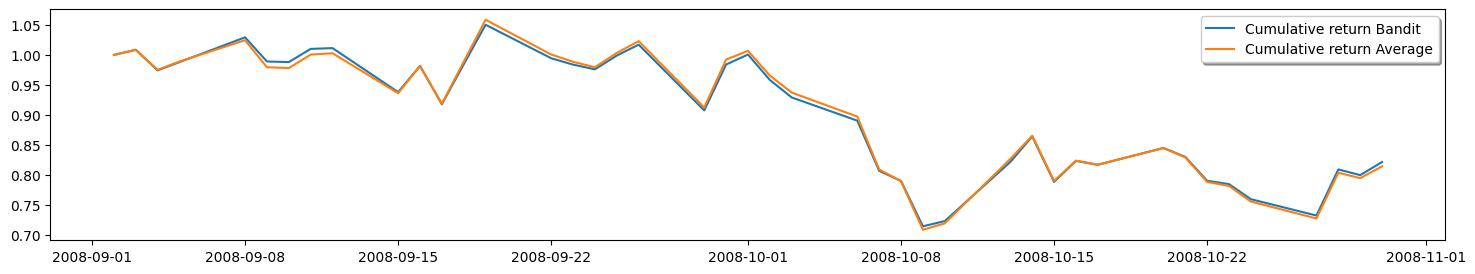

In [13]:
return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):  # noQA E203
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean(
        (pdata[tt + HOLD - 1, :] - pdata[tt - 1, :]) / pdata[tt - 1, :]
    )  # noQA E203
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)  # noQA E203

plt.plot(
    pdata_dates[HOLD - 1 : pdata.shape[0]],
    return_cumulative[:, 0],
    label="Cumulative return Bandit",
)  # noQA E203
plt.plot(
    pdata_dates[HOLD - 1 : pdata.shape[0]],
    return_cumulative[:, 1],
    label="Cumulative return Average",
)  # noQA E203
legend = plt.legend(loc="upper right", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

UCB code

In [18]:
# Define the UCB bandit algorithm
def ucb_bandit(stock_data, num_trials, num_stocks):
    num_assets = len(stock_data.columns)
    portfolio = np.zeros(num_assets)
    num_selections = np.zeros(num_assets)
    rewards = []
    optimal_actions = []
    optimal_action_counts = np.zeros(num_assets)

    for t in range(num_trials):
        if t < num_assets:
            action = t
        else:
            ucb_values = portfolio + np.sqrt((2 * np.log(t)) / num_selections)
            action = np.argmax(ucb_values)

        num_selections[action] += 1
        reward = stock_data.iloc[t, action]
        rewards.append(reward)

        optimal_action = np.argmax(portfolio)
        optimal_actions.append(optimal_action)
        optimal_action_counts[optimal_action] += 1

        portfolio[action] += (reward - portfolio[action]) / num_selections[action]

    return rewards, optimal_actions, optimal_action_counts

NameError: ignored

ϵ-greedy code

In [ ]:
def epsilon_greedy(stock_data, num_trials, num_stocks, epsilon):
    num_actions = len(stock_data.columns)
    rewards = []
    optimal_actions = []
    optimal_action_count = np.zeros(num_actions)
    action_selection_count = np.zeros(num_actions)
    action_values = np.zeros(num_actions)

    for t in range(num_trials):
        if np.random.random() < epsilon:
            action = np.random.randint(num_actions)
        else:
            action = np.argmax(action_values)

        reward = stock_data.iloc[t, action]
        rewards.append(reward)
        action_selection_count[action] += 1

        optimal_action = np.argmax(stock_data.iloc[t])
        optimal_actions.append(optimal_action)
        optimal_action_count[optimal_action] += 1

        action_values[action] += (reward - action_values[action]) / action_selection_count[action]

    return rewards, optimal_actions, optimal_action_count

Step-9: Epsilon greedy all stocks

In [30]:
def optimal_action(qvalue, eps):  # noQA E203
    """
    Determines what is the action to take given a measure of past
    expected rewards across actions. With probability eps the action
    is not the greedy one
    """
    nactions = qvalue.shape[0]
    action_hat = np.where(qvalue == np.max(qvalue))

    if rand() <= eps:
        randnum = rand()
        for aa in range(nactions):
            if randnum < (aa + 1) / nactions:  # noQA E203
                break
    elif action_hat[0].shape[0] > 1:  # noQA E203
        # Randomize action when ties
        randnum = rand()
        for aa in range(action_hat[0].shape[0]):  # noQA E203
            if randnum < (aa + 1) / action_hat[0].shape[0]:  # noQA E203
                break
        aa = action_hat[0][aa]
    else:
        aa = np.argmax(qvalue)

    return aa


def reward_update(action, reward, qvalue_old, alpha):  # noQA E203
    qvalue_new = qvalue_old.copy()

    qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])

    return qvalue_new

In [31]:
# Bandit problem for stock selection

NK = pdata.shape[1]
EPSILON = 0.1
ALPHA = 0.85 # as problem is non stationary
NEPISODES = 1000
HOLD = 1 # holding period one day
TMAX = pdata.shape[0] - HOLD


seed(1234)


reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))

reward_queue = np.zeros((HOLD, 2))

for run in range(NEPISODES):
    # Initialize q function and actions record
    qvalue = np.zeros((NK))

    nactions = np.zeros((NK))
    for tt in range(TMAX):  # noQA E203
        aa_opt = optimal_action(qvalue, EPSILON)
        nactions[aa_opt] += 1
        # Compute reward as return over holding period
        reward_queue[HOLD - 1, 0] = (
            pdata[tt + HOLD, aa_opt] - pdata[tt, aa_opt]
        ) / pdata[tt, aa_opt]
        reward_queue[HOLD - 1, 1] = aa_opt
        # Update Q function using action chosen HOLD days before
        # For equally weighted
        # ALPHA = 1/nactions[aa_opt]
        qvalue = reward_update(
            int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA
        )

        reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]  # noQA E203
        reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
        optimal_avg[tt] += (
            aa_opt == np.argmax((pdata[tt + HOLD, :] - pdata[tt, :]) / pdata[tt, :])
        ) / NEPISODES  # noQA E203

In [ ]:
pdata.shape[1]

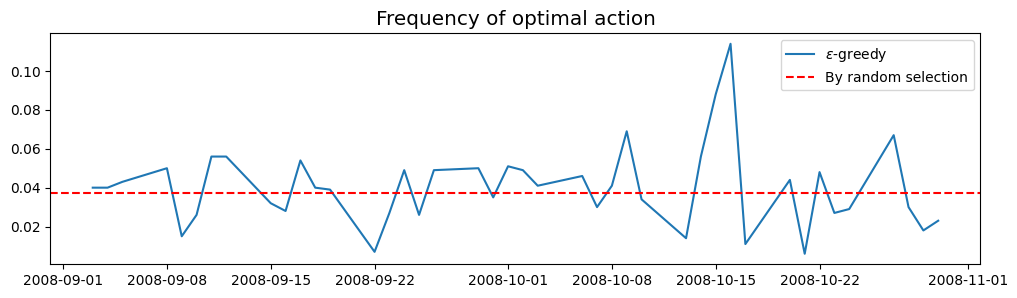

In [32]:
plt.plot(pdata_dates[HOLD:pdata.shape[0]], optimal_avg)
plt.title("Frequency of optimal action", fontsize='x-large')
plt.axhline(y=1/pdata.shape[1], color='r', linestyle='--')
plt.legend(['$\epsilon$-greedy', 'By random selection'])
fig = plt.gcf()
fig.set_size_inches(12,3)
plt.show()

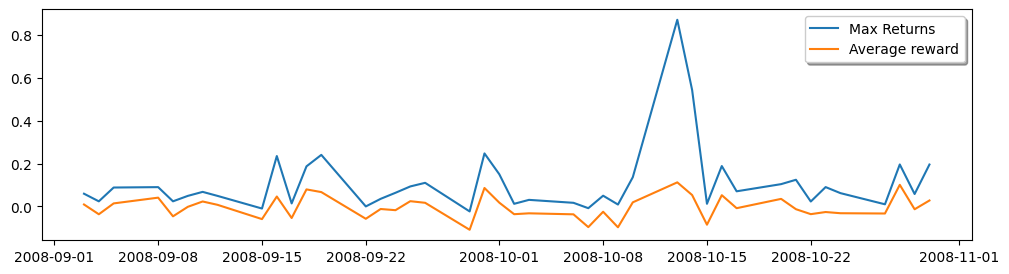

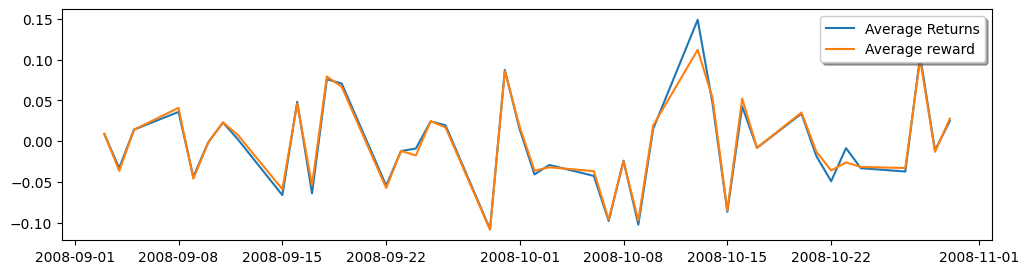


Average Frequency of optimal action:  0.0404

Average annualizedreturn from holding the equally-weighted portfolio:
Annualized return: -0.57, STD: 1.23

Average annualized return from holding the Bandit portfolio:
Annualized return: -0.54, STD: 0.83


In [33]:
plt.plot(pdata_dates[HOLD:pdata.shape[0]], np.max((pdata[HOLD:pdata.shape[0],:]-pdata[0:TMAX,:])/pdata[0:TMAX,:], axis=1), label='Max Returns')
plt.plot(pdata_dates[HOLD:pdata.shape[0]], reward_avg, label='Average reward')
legend = plt.legend(loc='upper right', shadow=True)
fig = plt.gcf()
fig.set_size_inches(12,3)
plt.show()

plt.plot(pdata_dates[HOLD:pdata.shape[0]], np.mean((pdata[HOLD:pdata.shape[0],:]-pdata[0:TMAX,:])/pdata[0:TMAX,:], axis=1), label='Average Returns')
plt.plot(pdata_dates[HOLD:pdata.shape[0]], reward_avg, label='Average reward')
legend = plt.legend(loc='upper right', shadow=True)
fig = plt.gcf()
fig.set_size_inches(12,3)
plt.show()

# Average frequency of optimal action
print()
print('Average Frequency of optimal action: ',round(np.mean(optimal_avg),4))
print()
# Average annualizedreturn from holding the equally-weighted portfolio
print('Average annualizedreturn from holding the equally-weighted portfolio:')
annual_return_portfolio = (1 + np.mean((pdata[HOLD:pdata.shape[0],:]-pdata[0:TMAX,:])/pdata[0:TMAX,:])) ** (250/HOLD) - 1
std_portfolio = np.sqrt(250/HOLD) * np.std((pdata[HOLD:pdata.shape[0],:]-pdata[0:TMAX,:])/pdata[0:TMAX,:])
print(f'Annualized return: {annual_return_portfolio.round(2)}, STD: {std_portfolio.round(2)}')
#print((1 + np.mean((pdata[HOLD:pdata.shape[0],:]-pdata[0:TMAX,:])/pdata[0:TMAX,:])) ** (250/HOLD) - 1, np.sqrt(250/HOLD) * np.std((pdata[HOLD:pdata.shape[0],:]-pdata[0:TMAX,:])/pdata[0:TMAX,:]))

# Average annualized return from holding the Bandit portfolio
print()
print("Average annualized return from holding the Bandit portfolio:")
annual_return_bandit = (1 + np.mean(reward_avg))** (250/HOLD) - 1
std_bandit = np.sqrt(250/HOLD) * np.std(reward_avg)
print(f"Annualized return: {annual_return_bandit.round(2)}, STD: {std_bandit.round(2)}")
#print((1 + np.mean(reward_avg))** (250/HOLD) - 1, np.sqrt(250/HOLD) * np.std(reward_avg))

Though return is some what greater than randomly chosen portfolio but it is not statistically significant different to consider. On the other hand standard deviation is less than that of randomly choosen equally weighted portfolio.

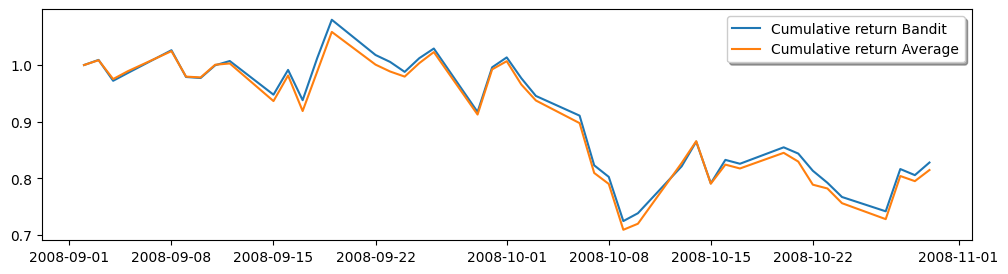

In [34]:
return_cumulative = np.zeros((TMAX+1,2))
return_cumulative[0,0] = 1
return_cumulative[0,1] = 1

for tt in range(1, TMAX+1):
  return_cumulative[tt,0] = return_cumulative[tt-1, 0] * (1+reward_avg[tt-1] )
  rmean = np.mean((pdata[tt+HOLD-1,:]-pdata[tt-1,:])/pdata[tt-1,:])
  return_cumulative[tt,1] = return_cumulative[tt-1,1] * (1+ rmean)

plt.plot(pdata_dates[HOLD-1:pdata.shape[0]], return_cumulative[:,0], label='Cumulative return Bandit')
plt.plot(pdata_dates[HOLD-1:pdata.shape[0]], return_cumulative[:,1], label='Cumulative return Average')
legend = plt.legend(loc='upper right', shadow=True)

fig = plt.gcf()
fig.set_size_inches(12,3)
plt.show()

# Step 10

In [ ]:
# List of 15 financial companies
ticker_1 = ['JPM', 'WFC', 'BAC', 'C', 'GS', 'USB', 'MS', 'KEY', 'PNC', 'COF', 'AXP', 'PRU', 'SCHW', 'BLK', 'STT']

In [ ]:
# List of 15 Non-Financial companies
ticker_2 = ['KR', 'PFE', 'XOM', 'WMT', 'DAL', 'CSCO', 'EQIX', 'DUK', 'NFLX', 'GE', 'APA', 'F', 'REGN', 'CMS', 'PEAK' ]

In [ ]:
# Combining all companies
tickers = ticker_1 + ticker_2

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

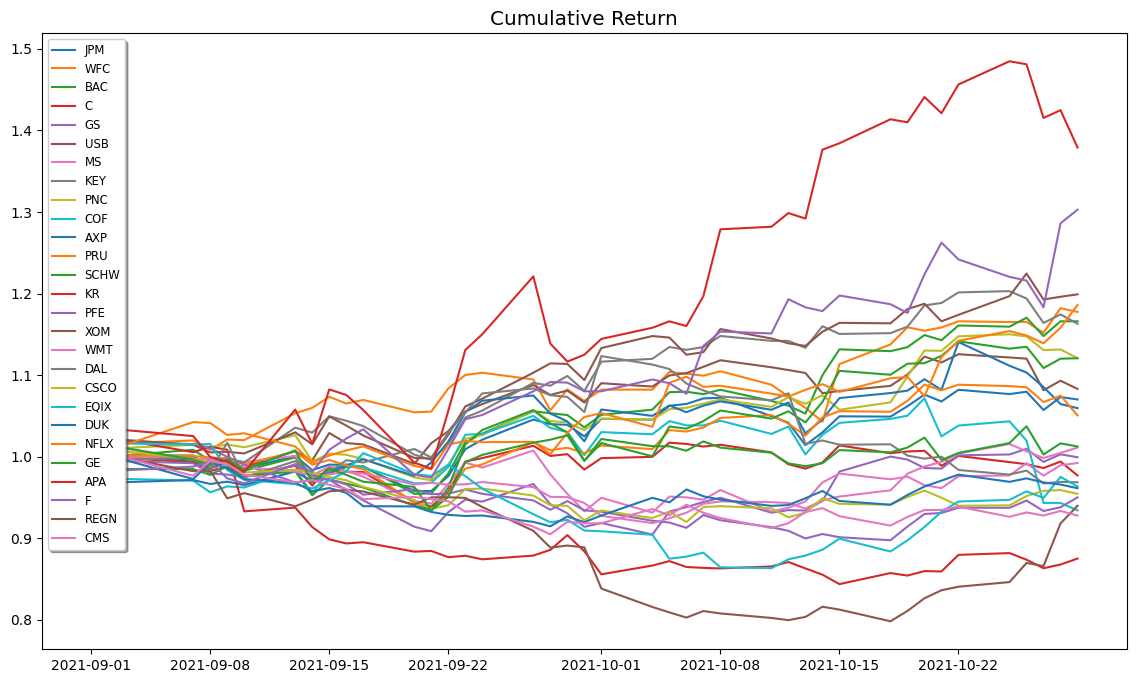

In [ ]:
data = pd.DataFrame()
data_ret = pd.DataFrame()
for tick in all_tickers:
    price = yf.download(tick, start='2021-09-01', end='2021-10-31')
    plt.plot(price['Adj Close']/price['Adj Close'][0], label = tick)
    price = price.rename(columns={'Adj Close': tick})
    price[tick+'ret'] = price[tick].pct_change()
    data = pd.concat([data, price[[tick]]], axis=1)
pdata = data.to_numpy()
pdata_dates = pd.to_datetime(price.index, format='%Y-%m-%d')
legend = plt.legend(loc='upper left', shadow=True, fontsize='small')
title = 'Cumulative Return'
plt.title(title, fontsize='x-large')
fig = plt.gcf()
fig.set_size_inches(14, 8)
plt.show()

# **Step 11: UCB and epsilon-greedy**

-UCB algorithm

In [ ]:

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Define the UCB bandit algorithm
def ucb_bandit(stock_data, num_trials, num_stocks):
    num_assets = len(stock_data.columns)
    portfolio = np.zeros(num_assets)
    num_selections = np.zeros(num_assets)
    rewards = []
    optimal_actions = []
    optimal_action_counts = np.zeros(num_assets)

    for t in range(num_trials):
        if t < num_assets:
            action = t
        else:
            ucb_values = portfolio + np.sqrt((2 * np.log(t)) / num_selections)
            action = np.argmax(ucb_values)

        num_selections[action] += 1
        reward = stock_data.iloc[t, action]
        rewards.append(reward)

        optimal_action = np.argmax(portfolio)
        optimal_actions.append(optimal_action)
        optimal_action_counts[optimal_action] += 1

        portfolio[action] += (reward - portfolio[action]) / num_selections[action]

    return rewards, optimal_actions, optimal_action_counts

# Define the greedy method
def greedy_method(stock_data, num_trials, num_stocks, epsilon):
    num_assets = len(stock_data.columns)
    portfolio = np.zeros(num_assets)
    num_selections = np.zeros(num_assets)
    rewards = []
    optimal_actions = []
    optimal_action_counts = np.zeros(num_assets)

    for t in range(num_trials):
        if np.random.random() < epsilon:
            action = np.random.randint(num_assets)
        else:
            action = np.argmax(portfolio)

        num_selections[action] += 1
        reward = stock_data.iloc[t, action]
        rewards.append(reward)

        optimal_action = np.argmax(portfolio)
        optimal_actions.append(optimal_action)
        optimal_action_counts[optimal_action] += 1

        portfolio[action] += (reward - portfolio[action]) / num_selections[action]

    return rewards, optimal_actions, optimal_action_counts

# Define the list of stock tickers
tickers = ["JPM", "WFC", "BAC", "C", "GS","USB",
                    "MS", "KEY", "PNC", "COF", "AXP", "PRU",
                    "SCHW","KR", "PFE", "XOM",
                    "WMT", "DAL", "CSCO", "EQIX", "DUK",
                    "NFLX", "GE", "APA", "F", "REGN", "CMS"]

# Download stock data from Yahoo Finance
data = yf.download(tickers, start="2019-09-01", end="2019-10-31")['Adj Close']

# Normalize the stock data
normalized_data = data.div(data.iloc[0])

# Run the UCB bandit algorithm
num_trials = len(normalized_data)
num_stocks = len(tickers)
ucb_rewards, ucb_optimal_actions, ucb_optimal_action_counts = ucb_bandit(normalized_data, num_trials, num_stocks)

# Plot the average rewards
ucb_avg_rewards = np.cumsum(ucb_rewards) / np.arange(1, num_trials + 1)

[*********************100%%**********************]  27 of 27 completed


Epsilon-Greedy Algorithm

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Function to calculate epsilon-greedy rewards and optimal action
def epsilon_greedy(stock_data, num_trials, num_stocks, epsilon):
    num_actions = len(stock_data.columns)
    rewards = []
    optimal_actions = []
    optimal_action_count = np.zeros(num_actions)
    action_selection_count = np.zeros(num_actions)
    action_values = np.zeros(num_actions)

    for t in range(num_trials):
        if np.random.random() < epsilon:
            action = np.random.randint(num_actions)
        else:
            action = np.argmax(action_values)

        reward = stock_data.iloc[t, action]
        rewards.append(reward)
        action_selection_count[action] += 1

        optimal_action = np.argmax(stock_data.iloc[t])
        optimal_actions.append(optimal_action)
        optimal_action_count[optimal_action] += 1

        action_values[action] += (reward - action_values[action]) / action_selection_count[action]

    return rewards, optimal_actions, optimal_action_count

# Define the list of stock tickers
tickers = ["JPM", "WFC", "BAC", "C", "GS","USB",
                    "MS", "KEY", "PNC", "COF", "AXP", "PRU",
                    "SCHW","KR", "PFE", "XOM",
                    "WMT", "DAL", "CSCO", "EQIX", "DUK",
                    "NFLX", "GE", "APA", "F", "REGN", "CMS"]

# Download stock data from Yahoo Finance
data = yf.download(tickers, start="2019-09-01", end="2019-10-31")['Adj Close']

# Normalize the stock data
normalized_data = data / data.iloc[0]

# Set the parameters for the epsilon-greedy algorithm
num_trials = len(normalized_data)
num_stocks = len(tickers)
epsilon = 0.25  # Exploration factor

# Run the epsilon-greedy algorithm
epsilon_greedy_rewards, epsilon_greedy_optimal_actions, optimal_action_count = epsilon_greedy(normalized_data, num_trials, num_stocks, epsilon)

# Calculate average rewards
epsilon_greedy_avg_rewards = np.cumsum(epsilon_greedy_rewards) / np.arange(1, num_trials + 1)

[*********************100%%**********************]  27 of 27 completed


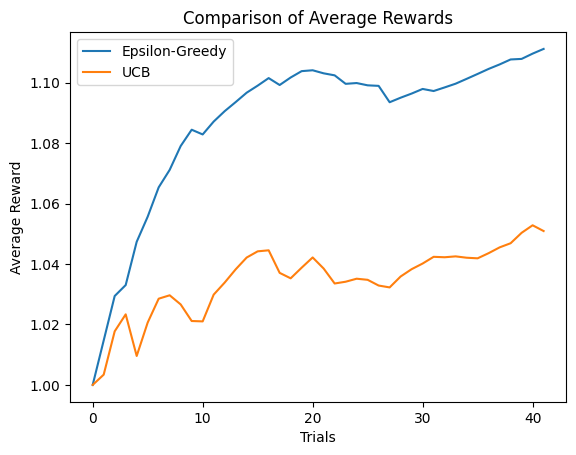

In [ ]:
# Plot the line graph comparing average rewards
plt.plot(epsilon_greedy_avg_rewards, label='Epsilon-Greedy')
plt.plot(ucb_avg_rewards, label='UCB')
plt.xlabel('Trials')
plt.ylabel('Average Reward')
plt.title('Comparison of Average Rewards')
plt.legend()

Explanation